In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [3]:
#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [4]:
#preprocess.
from keras.preprocessing.image import ImageDataGenerator

In [5]:
#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical

In [6]:
# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [7]:
# #configure
# # sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
# style.use('fivethirtyeight')
# sns.set(style='whitegrid',color_codes=True)


import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [8]:
X=[]
Z=[]
IMG_SIZE=150
GLIOMA_TUMOR="Training\glioma_tumor"
NO_TUMOR='Training/no_tumor'
PITUITARY_TUMOR="Training\pituitary_tumor"
MENINGIOMA_TUTOR="Training\meningioma_tumor"

In [9]:
def assign_label(img, tumor_type):
    return tumor_type

In [10]:
def make_train_data(tumor_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,tumor_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))  

In [11]:
make_train_data('Glioma',GLIOMA_TUMOR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 826/826 [00:07<00:00, 112.23it/s]

826


In [12]:
make_train_data('Notumor',NO_TUMOR)
print(len(X))


100%|███████████████████████████████████████████████████████████████████████████████| 386/386 [00:02<00:00, 174.38it/s]

1212


In [13]:
make_train_data('Pituitary',PITUITARY_TUMOR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 827/827 [00:06<00:00, 135.73it/s]

2039


In [14]:
make_train_data('Meningioma',MENINGIOMA_TUTOR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 822/822 [00:05<00:00, 143.70it/s]

2861


In [17]:
print(len(X))
print(len(Z))
print(set(Z))

2861
2861
{'Pituitary', 'Notumor', 'Meningioma', 'Glioma'}


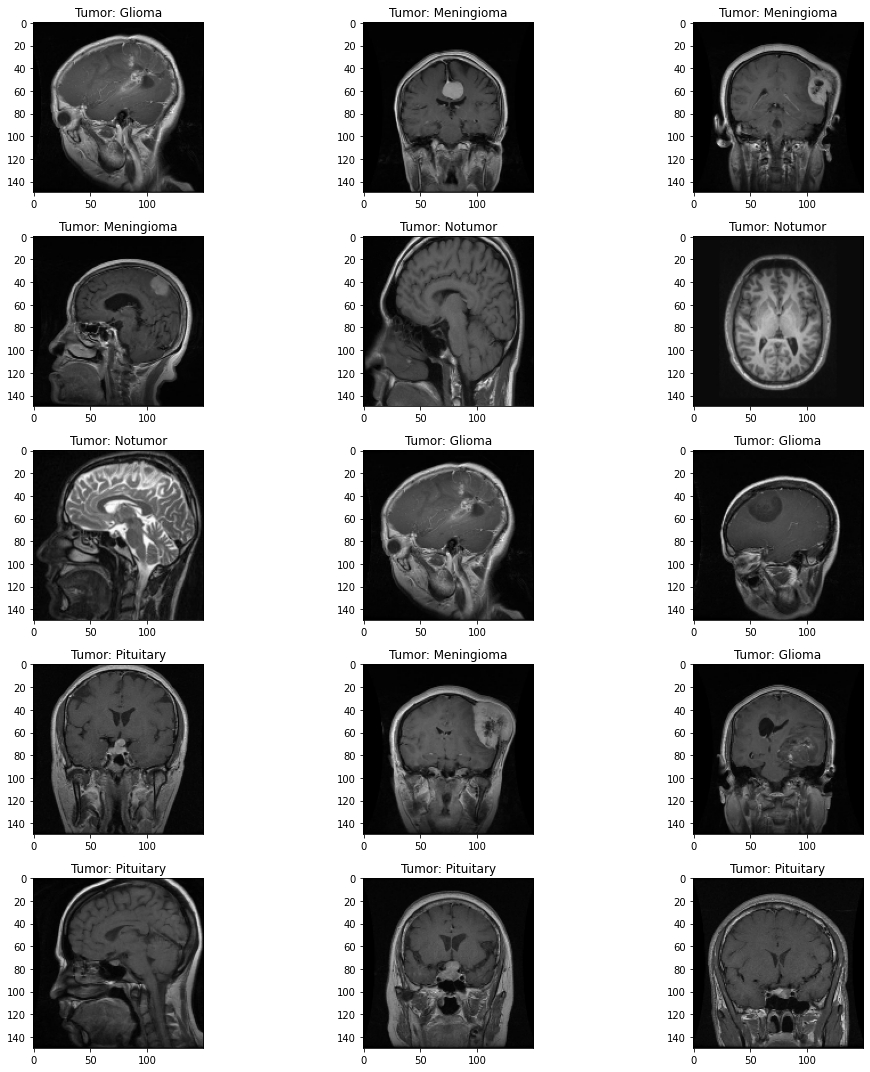

In [18]:
fig,ax=plt.subplots(5,3)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (3):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Tumor: '+Z[l])
        
plt.tight_layout();       

In [19]:
print("Number of Pixles in each image :",150*150*3)

Number of Pixles in each image : 67500


In [20]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,4)
print(Y.shape)

(2861, 4)


In [21]:
print(type(X))
print(len(X))
print(X[1].shape)

<class 'list'>
2861
(150, 150, 3)


In [22]:
X_NEW=np.array(X)
# Image Standardization [Scale 0-1]
X_NEW=X_NEW/255

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X_NEW,Y,test_size=0.20,random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [24]:
np.shape(X_train),np.shape(y_train),np.shape(X_test),np.shape(y_test)
#np.shape(X_val),np.shape(y_val)

((2288, 150, 150, 3), (2288, 4), (573, 150, 150, 3), (573, 4))

In [25]:
# # modelling starts using a CNN.


# Initialising the CNN classifier
model = Sequential()

# Add a Convolution layer with 32 kernels of 5X5 shape with activation function ReLU
model.add(Conv2D(filters = 32, kernel_size = (5,5),activation ='relu', input_shape = (150,150,3)))

# Add a Max Pooling layer of size 2X2
model.add(MaxPooling2D(pool_size=(2,2)))

# Add another Convolution layer with 64 kernels of 3X3 shape with activation function ReLU
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))

# Adding another pooling layer
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

# Add another Convolution layer with 96 kernels of 3X3 shape with activation function ReLU
model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))

# Adding another pooling layer
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


# Flattening the layer before fully connected layers
model.add(Flatten())

# Adding a fully connected layer with 512 neurons
model.add(Dense(512,activation='relu'))

# The final output layer with 5 neuron to predict the categorical classifcation
model.add(Dense(4, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 73, 73, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 36, 36, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 96)       0

In [26]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
batchSize=256
ep=21
history=model.fit(X_train,y_train,batch_size=batchSize,epochs=ep,validation_split=.15)

Epoch 1/21
8/8 [==============================] - 122s 13s/step - loss: 1.4060 - accuracy: 0.3889 - val_loss: 1.1014 - val_accuracy: 0.5262
Epoch 2/21
8/8 [==============================] - 87s 11s/step - loss: 1.0476 - accuracy: 0.5576 - val_loss: 0.9468 - val_accuracy: 0.5465
Epoch 3/21
8/8 [==============================] - 82s 10s/step - loss: 0.8548 - accuracy: 0.6271 - val_loss: 0.9110 - val_accuracy: 0.6047
Epoch 4/21
8/8 [==============================] - 78s 10s/step - loss: 0.7161 - accuracy: 0.7094 - val_loss: 0.7399 - val_accuracy: 0.7035
Epoch 5/21
8/8 [==============================] - 80s 10s/step - loss: 0.5827 - accuracy: 0.7747 - val_loss: 0.6951 - val_accuracy: 0.7267
Epoch 6/21
8/8 [==============================] - 70s 9s/step - loss: 0.4915 - accuracy: 0.8112 - val_loss: 0.7777 - val_accuracy: 0.6860
Epoch 7/21
8/8 [==============================] - 82s 10s/step - loss: 0.4958 - accuracy: 0.7932 - val_loss: 0.5512 - val_accuracy: 0.7762
Epoch 8/21
8/8 [===========

In [28]:
model.evaluate(X_test,y_test)

18/18 [==============================] - 6s 342ms/step - loss: 0.5349 - accuracy: 0.8901


[0.5349480509757996, 0.8900523781776428]

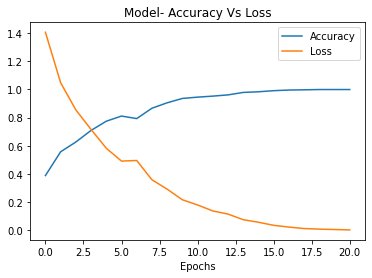

In [29]:
plt.plot(range(len(history.history['accuracy'])),history.history['accuracy'])
plt.plot(range(len(history.history['loss'])),history.history['loss'])
plt.title('Model- Accuracy Vs Loss')
plt.xlabel('Epochs')
plt.legend(['Accuracy', 'Loss'])
plt.show()

In [30]:
model

In [31]:
model.history

In [32]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [33]:
# getting predictions on val set.
pred=model.predict(X_test)
print("Predicted Probabilities -\n",pred[:4])
pred_digits=np.argmax(pred,axis=1)
print("\nPredicted Class [Highest Prob] -",pred_digits[:4])

Predicted Probabilities -
 [[3.1453282e-18 2.6410582e-08 3.4856798e-11 1.0000000e+00]
 [8.2598016e-02 9.1740084e-01 3.5807389e-08 1.0734146e-06]
 [9.9957746e-01 4.2251046e-04 1.2185944e-10 1.4996214e-16]
 [3.1926089e-07 1.3804920e-06 1.0623772e-05 9.9998760e-01]]

Predicted Class [Highest Prob] - [3 1 0 3]


In [34]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

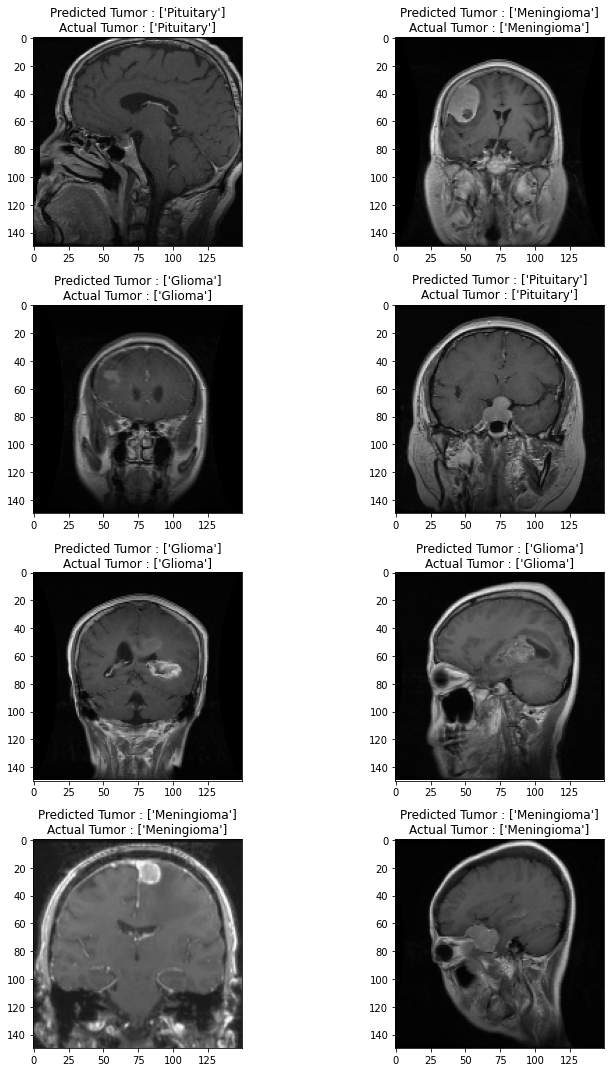

In [35]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(X_test[prop_class[count]])
        ax[i,j].set_title("Predicted Tumor : "+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Tumor : "+str(le.inverse_transform([np.argmax(y_test[prop_class[count]])])))
        plt.tight_layout()
        count+=1

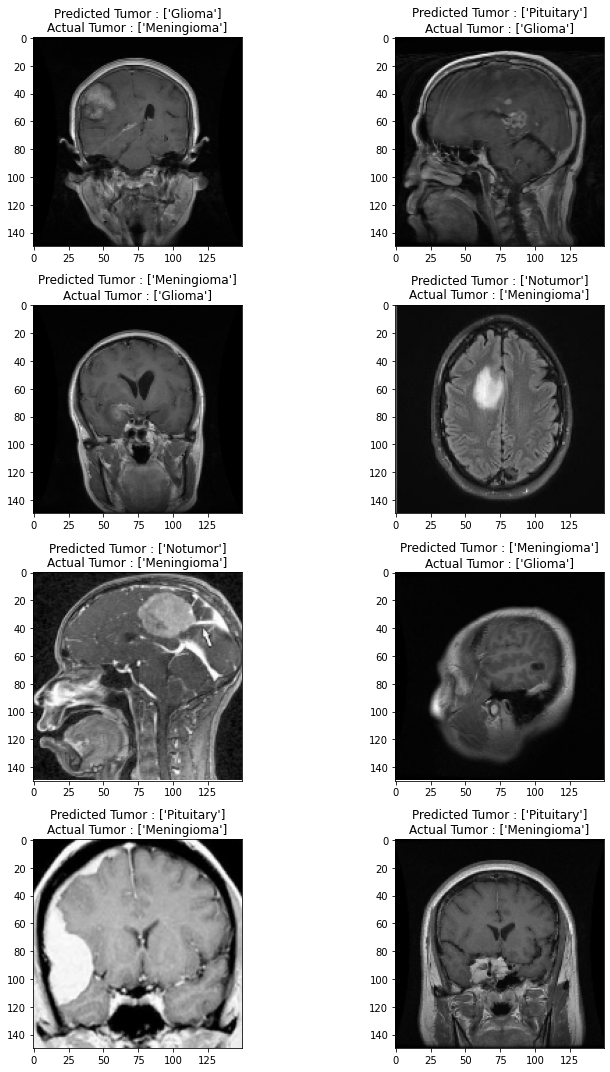

In [36]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(X_test[mis_class[count]])
        ax[i,j].set_title("Predicted Tumor : "+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual Tumor : "+str(le.inverse_transform([np.argmax(y_test[mis_class[count]])])))
        plt.tight_layout()
        count+=1

In [37]:
from sklearn import metrics

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
matrix = metrics.confusion_matrix(y_test.argmax(axis=1), pred.argmax(axis=1))

In [40]:
matrix

array([[160,  11,   1,   1],
       [ 17, 134,  11,   3],
       [  5,   6,  55,   4],
       [  0,   4,   0, 161]], dtype=int64)

In [53]:
model.save("model")

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


In [41]:
model.save("model.h5")

In [54]:
model = tf.keras.models.load_model('model.h5')

In [54]:
model = tf.keras.models.load_model('model.h5')

# model.compile(loss='binary_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])

img = cv2.imread('no.jpg')
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])

classes = model.predict(img)
y_classes = classes.argmax(axis=-1)
print(classes)
print(y_classes)

[[0. 0. 1. 0.]]
[2]


In [52]:
import tensorflow as tf

model = tf.keras.models.load_model('model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\aa\AppData\Local\Temp\tmpssf5s79h\assets


INFO:tensorflow:Assets written to: C:\Users\aa\AppData\Local\Temp\tmpssf5s79h\assets


64020144

In [ ]:
We've also created a mobile App by using tflite model with flutter framework which helps medical professionals to make a conclusion on gven MRI Scan as an input.